In [2]:
#install dependencies
#----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, stats
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("tab10", 10)

from itertools import chain

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
filename = '../data_processed/csv/wisconsin_clean.csv'
df=pd.read_csv(filename, index_col=0)
df

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,sum_scores
0,5,1,1,1,2,1,3,1,1,2,36
1,5,4,4,5,7,10,3,2,1,2,86
2,3,1,1,1,2,2,3,1,1,2,34
3,6,8,8,1,3,4,3,7,1,2,86
4,4,1,1,3,2,1,3,1,1,2,38
...,...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2,32
695,2,1,1,1,2,1,1,1,1,2,26
696,5,10,10,3,7,3,8,10,2,4,124
697,4,8,6,4,3,4,10,6,1,4,100


In [4]:
feat_mean = np.mean(df['clump_thickness'])
print(feat_mean)

4.44216691068814


In [9]:
np.random.seed(121)
samples_50 = df['clump_thickness'].sample(50, replace=True)
samples_100 = df['clump_thickness'].sample(100, replace=True)
samples_250 = df['clump_thickness'].sample(250, replace=True)
samples_500 = df['clump_thickness'].sample(500, replace=True)

print(f'The mean of the observed population is: {feat_mean:.2f}; mean for 50 samples is: {np.mean(samples_50):.2f},\
for 100 samples is: {np.mean(samples_100):.2f},for 250 samples is: {np.mean(samples_250):.2f}, \
and for 500 samples is: {np.mean(samples_500):.2f}.')

The mean of the observed population is: 4.44; mean for 50 samples is: 4.74,for 100 samples is: 4.22,for 250 samples is: 4.55, and for 500 samples is: 4.47.


## Correlation of Features
Since there are features where some of the scores have less than 5 in frequency, a chi-square cannot be performed. Since the values for scores are ordinal from 1-10 and equally spaced by 1, then it will be treated as numerical. Pearson's correlation, Spearman's rho and Kendall's tau will be done with the data.

### Pearson's correlation

In [10]:
df_ben = df[df['class']==2]
df_ben

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,sum_scores
0,5,1,1,1,2,1,3,1,1,2,36
1,5,4,4,5,7,10,3,2,1,2,86
2,3,1,1,1,2,2,3,1,1,2,34
3,6,8,8,1,3,4,3,7,1,2,86
4,4,1,1,3,2,1,3,1,1,2,38
...,...,...,...,...,...,...,...,...,...,...,...
690,1,1,1,3,2,1,1,1,1,2,28
692,3,1,1,1,2,1,1,1,1,2,28
693,3,1,1,1,2,1,2,1,2,2,32
694,3,1,1,1,3,2,1,1,1,2,32


In [11]:
df_mal = df[df['class']==4]
df_mal

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,sum_scores
5,8,10,10,8,7,10,9,7,1,4,148
12,5,3,3,3,2,3,4,4,1,4,64
14,8,7,5,10,7,9,5,5,4,4,128
15,7,4,6,4,6,1,4,3,1,4,80
18,10,7,7,6,4,10,4,1,2,4,110
...,...,...,...,...,...,...,...,...,...,...,...
681,5,10,10,10,4,10,5,6,3,4,134
691,5,10,10,5,4,5,4,4,1,4,104
696,5,10,10,3,7,3,8,10,2,4,124
697,4,8,6,4,3,4,10,6,1,4,100


In [12]:
#drop class since it only has 2 values and only keep the ones that are numerical 1 to 10.
corr_dropped_pearson = df.drop(columns='class')
corr_dropped_pearson = corr_dropped_pearson.corr(method='pearson')
corr_dropped_pearson

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,sum_scores
clump_thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.744765
uniformity_cell_size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.919591
uniformity_cell_shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.914333
marginal_adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.809067
single_epithelial_cell_size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.801055
bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.833462
bland_chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.834978
normal_nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.815250
mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.545652
sum_scores,0.744765,0.919591,0.914333,0.809067,0.801055,0.833462,0.834978,0.815250,0.545652,1.000000


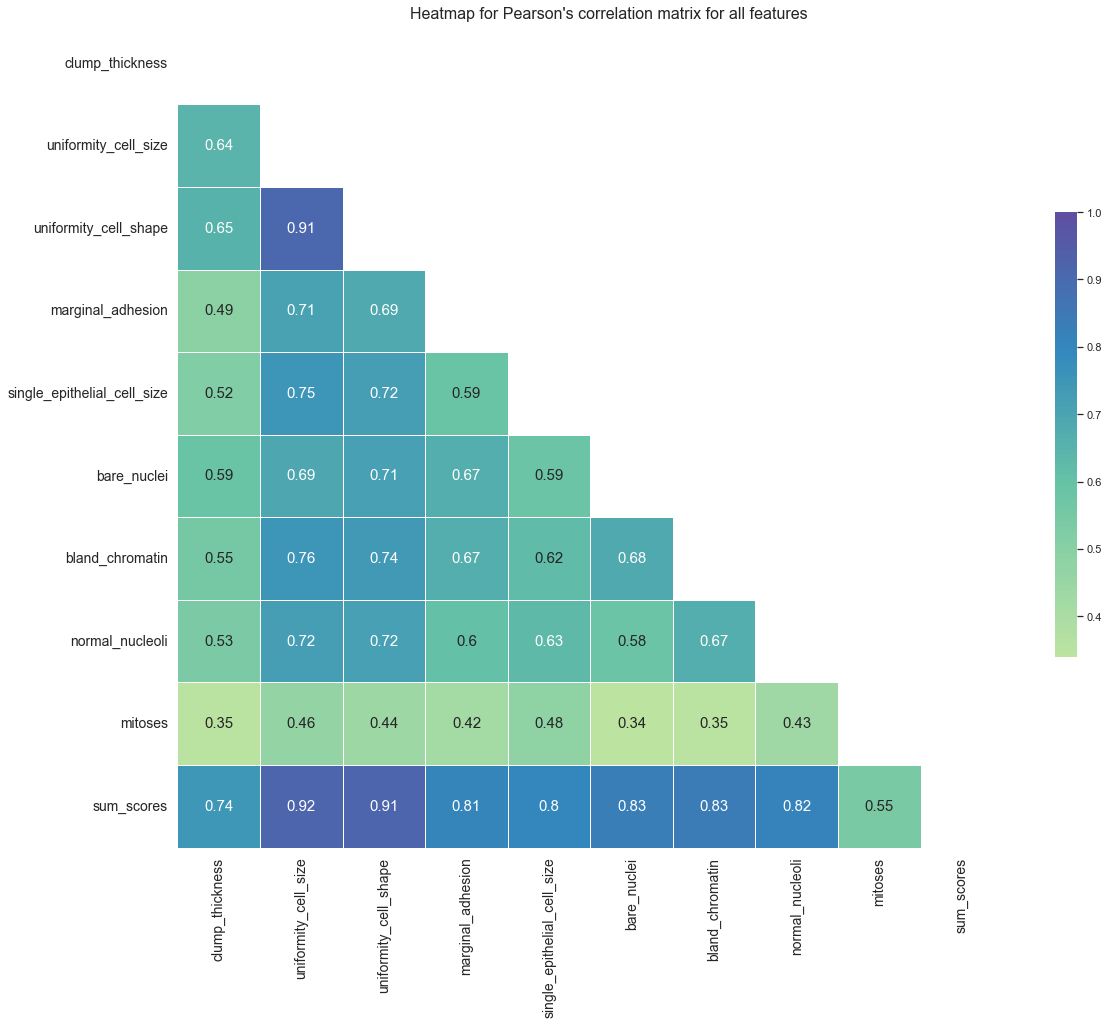

In [13]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_dropped_pearson, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_dropped_pearson, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for Pearson's correlation matrix for all features", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/heatmap_corr_plots.png', bbox_inches='tight',dpi=600)
plt.show()

In [14]:
corr_df_ben_pearson = df_ben.drop(columns=['class'])
corr_df_ben_pearson = corr_df_ben_pearson.corr(method='pearson')
corr_df_ben_pearson = corr_df_ben_pearson.dropna()
corr_df_ben_pearson

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,sum_scores
clump_thickness,1.000000,0.275855,0.298429,0.255388,0.158063,0.115207,0.100785,0.205244,-0.039594,0.571867
uniformity_cell_size,0.275855,1.000000,0.696421,0.281418,0.409948,0.461013,0.264898,0.487685,0.047185,0.749913
uniformity_cell_shape,0.298429,0.696421,1.000000,0.239653,0.344502,0.358815,0.194651,0.390216,-0.000083,0.684922
marginal_adhesion,0.255388,0.281418,0.239653,1.000000,0.292839,0.373200,0.116239,0.254664,0.062491,0.557237
single_epithelial_cell_size,0.158063,0.409948,0.344502,0.292839,1.000000,0.332888,0.152628,0.437988,-0.015829,0.585108
bare_nuclei,0.115207,0.461013,0.358815,0.373200,0.332888,1.000000,0.205968,0.308704,0.120092,0.635399
bland_chromatin,0.100785,0.264898,0.194651,0.116239,0.152628,0.205968,1.000000,0.343546,-0.043424,0.465957
normal_nucleoli,0.205244,0.487685,0.390216,0.254664,0.437988,0.308704,0.343546,1.000000,0.057632,0.663543
mitoses,-0.039594,0.047185,-0.000083,0.062491,-0.015829,0.120092,-0.043424,0.057632,1.000000,0.129780
sum_scores,0.571867,0.749913,0.684922,0.557237,0.585108,0.635399,0.465957,0.663543,0.129780,1.000000


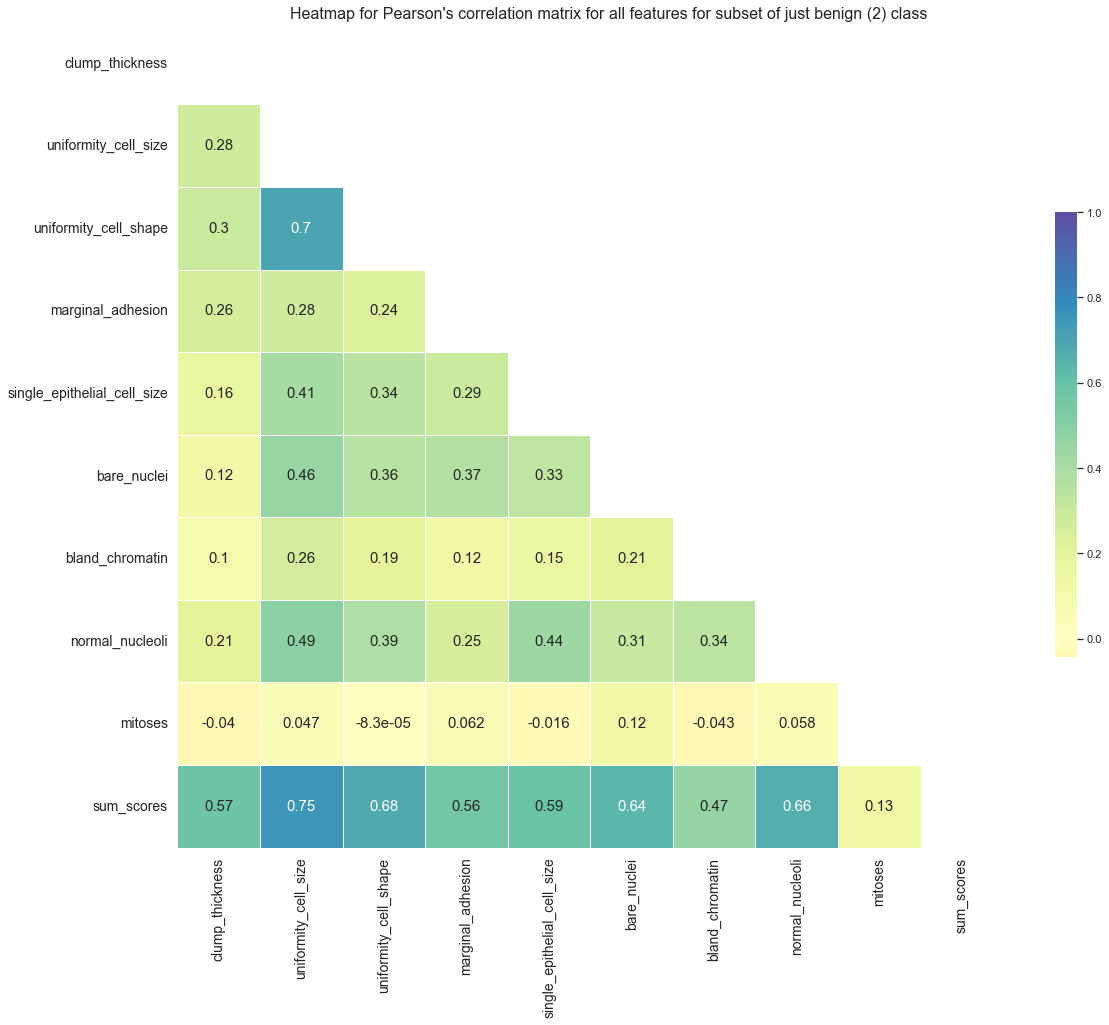

In [15]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df_ben_pearson, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_df_ben_pearson, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for Pearson's correlation matrix for all features for subset of just benign (2) class", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/heatmap_corr_ben_plots.png', bbox_inches='tight',dpi=600)
plt.show()

In [16]:
corr_df_mal_pearson = df_mal.drop(columns=['class'])
corr_df_mal_pearson = corr_df_mal_pearson.corr(method='pearson')
corr_df_mal_pearson = corr_df_mal_pearson.dropna()
corr_df_mal_pearson

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,sum_scores
clump_thickness,1.000000,0.097438,0.112548,-0.144148,0.017152,-0.036078,-0.018025,-0.013174,0.118206,0.209268
uniformity_cell_size,0.097438,1.000000,0.720782,0.320449,0.460828,-0.039891,0.388866,0.299189,0.241080,0.730132
uniformity_cell_shape,0.112548,0.720782,1.000000,0.267325,0.383091,0.052947,0.338472,0.309652,0.209983,0.711651
marginal_adhesion,-0.144148,0.320449,0.267325,1.000000,0.192775,0.193632,0.337764,0.184831,0.201249,0.576895
single_epithelial_cell_size,0.017152,0.460828,0.383091,0.192775,1.000000,-0.031428,0.216225,0.231148,0.333305,0.575311
bare_nuclei,-0.036078,-0.039891,0.052947,0.193632,-0.031428,1.000000,0.136894,-0.083194,-0.037522,0.276197
bland_chromatin,-0.018025,0.388866,0.338472,0.337764,0.216225,0.136894,1.000000,0.253494,0.059304,0.562648
normal_nucleoli,-0.013174,0.299189,0.309652,0.184831,0.231148,-0.083194,0.253494,1.000000,0.222353,0.544634
mitoses,0.118206,0.241080,0.209983,0.201249,0.333305,-0.037522,0.059304,0.222353,1.000000,0.489731
sum_scores,0.209268,0.730132,0.711651,0.576895,0.575311,0.276197,0.562648,0.544634,0.489731,1.000000


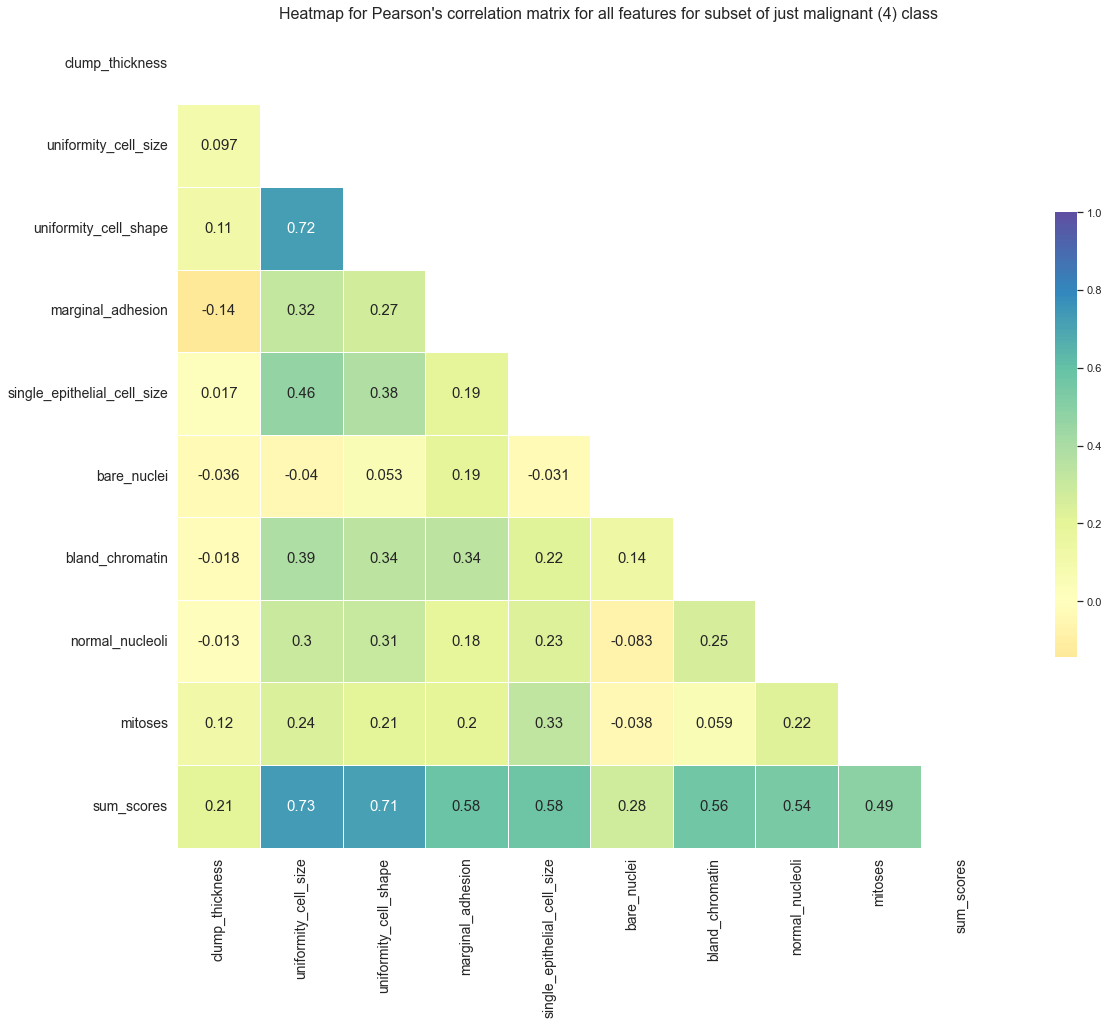

In [17]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df_mal_pearson, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_df_mal_pearson, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for Pearson's correlation matrix for all features for subset of just malignant (4) class", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/heatmap_corr_mal_plots.png', bbox_inches='tight',dpi=600)
plt.show()

### Spearman's rho

In [18]:
#drop class since it only has 2 values and only keep the ones that are numerical 1 to 10.
corr_dropped_rho = df.drop(columns='class')
corr_dropped_rho = corr_dropped_rho.corr(method='spearman')
corr_dropped_rho


,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,sum_scores
clump_thickness,1.000000,0.663684,0.666652,0.543815,0.586755,0.590770,0.533848,0.566398,0.421208,0.816098
uniformity_cell_size,0.663684,1.000000,0.894978,0.745475,0.792814,0.769543,0.720595,0.752510,0.512688,0.864335
uniformity_cell_shape,0.666652,0.894978,1.000000,0.718722,0.765073,0.752950,0.694888,0.724410,0.478400,0.856706
marginal_adhesion,0.543815,0.745475,0.718722,1.000000,0.665190,0.696792,0.628738,0.636409,0.447254,0.772973
single_epithelial_cell_size,0.586755,0.792814,0.765073,0.665190,1.000000,0.694579,0.645090,0.710628,0.483210,0.796613
bare_nuclei,0.590770,0.769543,0.752950,0.696792,0.694579,1.000000,0.678963,0.659762,0.474316,0.791541
bland_chromatin,0.533848,0.720595,0.694888,0.628738,0.645090,0.678963,1.000000,0.662096,0.390600,0.764149
normal_nucleoli,0.566398,0.752510,0.724410,0.636409,0.710628,0.659762,0.662096,1.000000,0.510210,0.761571
mitoses,0.421208,0.512688,0.478400,0.447254,0.483210,0.474316,0.390600,0.510210,1.000000,0.529824
sum_scores,0.816098,0.864335,0.856706,0.772973,0.796613,0.791541,0.764149,0.761571,0.529824,1.000000


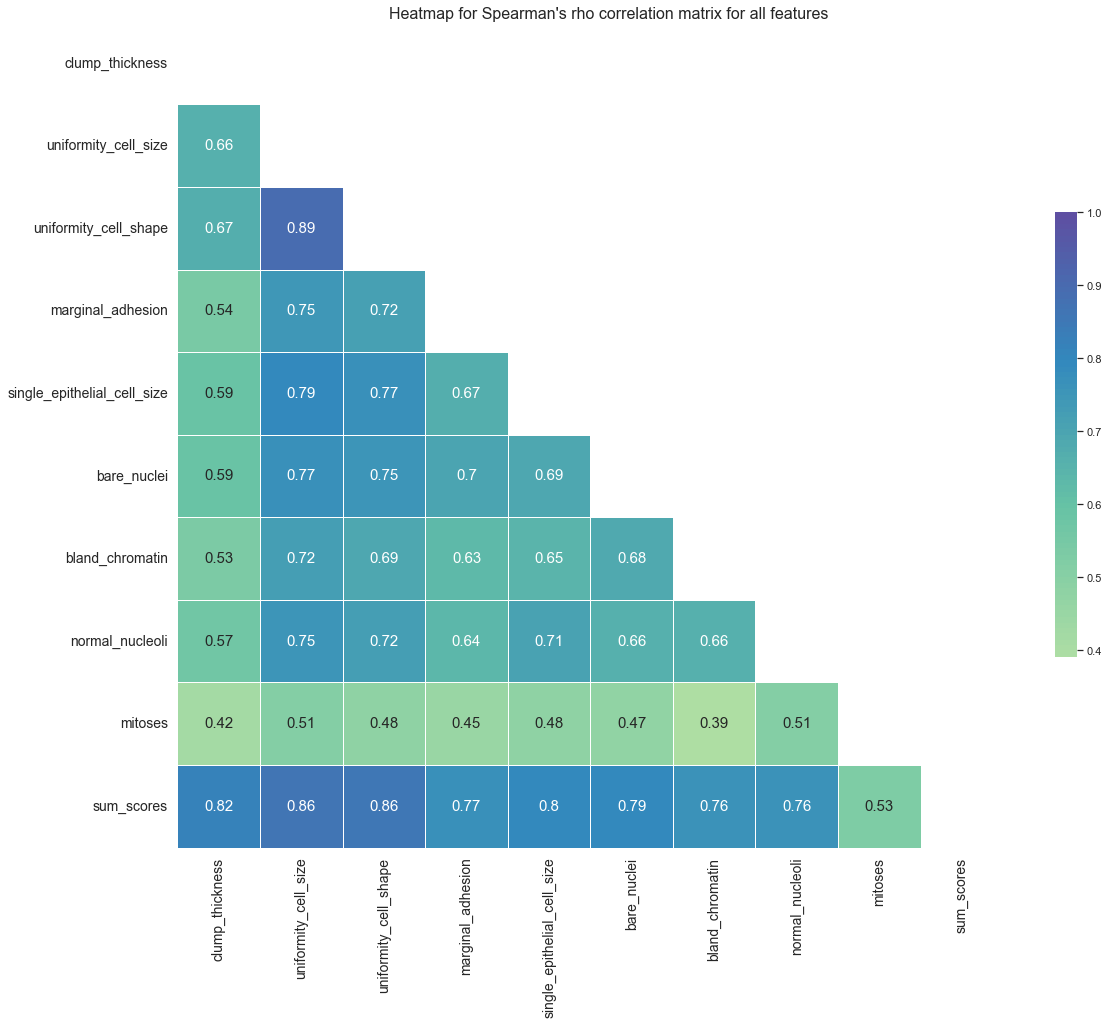

In [19]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_dropped_rho, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_dropped_rho, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for Spearman's rho correlation matrix for all features", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/heatmap_corr_rho_mal_plots.png', bbox_inches='tight',dpi=600)
plt.show()

In [20]:
corr_df_ben_rho = df_ben.drop(columns=['class'])
corr_df_ben_rho = corr_df_ben_rho.corr(method='spearman')
corr_df_ben_rho = corr_df_ben_rho.dropna()
corr_df_ben_rho

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,sum_scores
clump_thickness,1.000000,0.231432,0.257858,0.213422,0.196515,0.075868,0.071742,0.191944,0.033948,0.734186
uniformity_cell_size,0.231432,1.000000,0.535038,0.293775,0.281524,0.283381,0.147459,0.385694,0.179156,0.496907
uniformity_cell_shape,0.257858,0.535038,1.000000,0.253479,0.240221,0.219929,0.115804,0.262869,0.090258,0.493297
marginal_adhesion,0.213422,0.293775,0.253479,1.000000,0.197775,0.240239,0.039425,0.236234,0.152822,0.424617
single_epithelial_cell_size,0.196515,0.281524,0.240221,0.197775,1.000000,0.262711,0.056625,0.303902,0.055363,0.403666
bare_nuclei,0.075868,0.283381,0.219929,0.240239,0.262711,1.000000,0.146191,0.243225,0.177604,0.393965
bland_chromatin,0.071742,0.147459,0.115804,0.039425,0.056625,0.146191,1.000000,0.280157,0.011807,0.352353
normal_nucleoli,0.191944,0.385694,0.262869,0.236234,0.303902,0.243225,0.280157,1.000000,0.146350,0.410660
mitoses,0.033948,0.179156,0.090258,0.152822,0.055363,0.177604,0.011807,0.146350,1.000000,0.187331
sum_scores,0.734186,0.496907,0.493297,0.424617,0.403666,0.393965,0.352353,0.410660,0.187331,1.000000


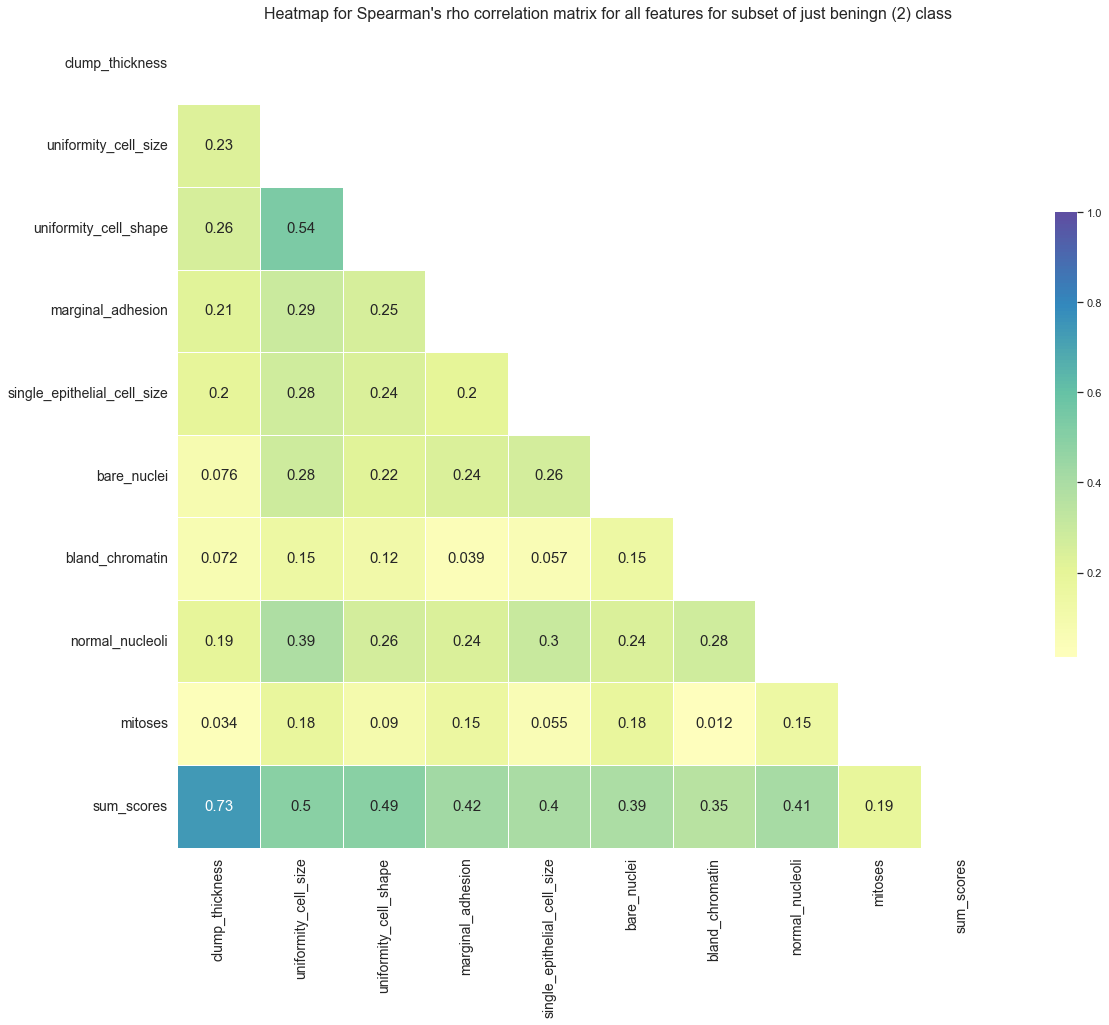

In [21]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df_ben_rho, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_df_ben_rho, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for Spearman's rho correlation matrix for all features for subset of just beningn (2) class", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/heatmap_corr_rho_mal_plots.png', bbox_inches='tight',dpi=600)
plt.show()

In [22]:
corr_df_mal_rho = df_mal.drop(columns=['class'])
corr_df_mal_rho = corr_df_mal_rho.corr(method='spearman')
corr_df_mal_rho = corr_df_mal_rho.dropna()
corr_df_mal_rho

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,sum_scores
clump_thickness,1.000000,0.087241,0.110026,-0.139361,-0.018137,-0.008470,-0.010643,-0.021825,0.126951,0.185194
uniformity_cell_size,0.087241,1.000000,0.713987,0.320255,0.479190,-0.017063,0.388913,0.306413,0.195545,0.734013
uniformity_cell_shape,0.110026,0.713987,1.000000,0.267530,0.388876,0.057692,0.340210,0.307381,0.147935,0.703234
marginal_adhesion,-0.139361,0.320255,0.267530,1.000000,0.215600,0.229254,0.342952,0.190839,0.179882,0.568328
single_epithelial_cell_size,-0.018137,0.479190,0.388876,0.215600,1.000000,-0.028104,0.242368,0.279105,0.264103,0.590874
bare_nuclei,-0.008470,-0.017063,0.057692,0.229254,-0.028104,1.000000,0.144217,-0.091643,0.017160,0.261151
bland_chromatin,-0.010643,0.388913,0.340210,0.342952,0.242368,0.144217,1.000000,0.260726,0.016017,0.562933
normal_nucleoli,-0.021825,0.306413,0.307381,0.190839,0.279105,-0.091643,0.260726,1.000000,0.226985,0.542722
mitoses,0.126951,0.195545,0.147935,0.179882,0.264103,0.017160,0.016017,0.226985,1.000000,0.417840
sum_scores,0.185194,0.734013,0.703234,0.568328,0.590874,0.261151,0.562933,0.542722,0.417840,1.000000


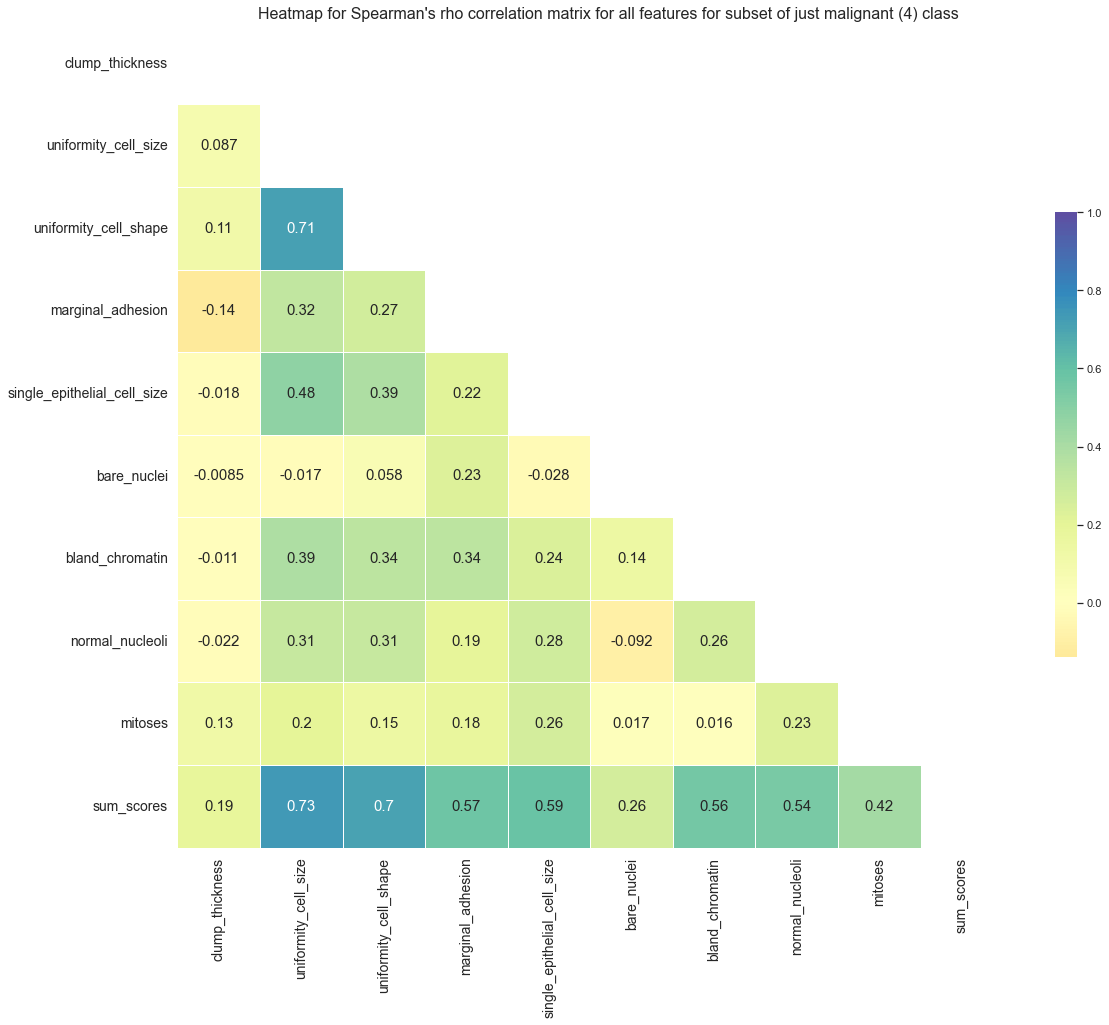

In [23]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df_mal_rho, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_df_mal_rho, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for Spearman's rho correlation matrix for all features for subset of just malignant (4) class", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/heatmap_corr_rho_mal_plots.png', bbox_inches='tight',dpi=600)
plt.show()

### Kendall's tau

In [24]:
#drop class since it only has 2 values and only keep the ones that are numerical 1 to 10.
corr_dropped_tau = df.drop(columns='class')
corr_dropped_tau = corr_dropped_tau.corr(method='kendall')
corr_dropped_tau

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,sum_scores
clump_thickness,1.000000,0.533457,0.536357,0.434561,0.471656,0.478717,0.413707,0.458590,0.354887,0.667863
uniformity_cell_size,0.533457,1.000000,0.818031,0.641547,0.686886,0.658114,0.600596,0.658250,0.458471,0.738570
uniformity_cell_shape,0.536357,0.818031,1.000000,0.611298,0.655215,0.641268,0.573873,0.627182,0.423641,0.726183
marginal_adhesion,0.434561,0.641547,0.611298,1.000000,0.567886,0.608898,0.514485,0.548099,0.399838,0.633374
single_epithelial_cell_size,0.471656,0.686886,0.655215,0.567886,1.000000,0.595862,0.526593,0.612276,0.433556,0.653724
bare_nuclei,0.478717,0.658114,0.641268,0.608898,0.595862,1.000000,0.565404,0.569469,0.424860,0.647002
bland_chromatin,0.413707,0.600596,0.573873,0.514485,0.526593,0.565404,1.000000,0.561690,0.336137,0.617742
normal_nucleoli,0.458590,0.658250,0.627182,0.548099,0.612276,0.569469,0.561690,1.000000,0.458668,0.629301
mitoses,0.354887,0.458471,0.423641,0.399838,0.433556,0.424860,0.336137,0.458668,1.000000,0.438772
sum_scores,0.667863,0.738570,0.726183,0.633374,0.653724,0.647002,0.617742,0.629301,0.438772,1.000000


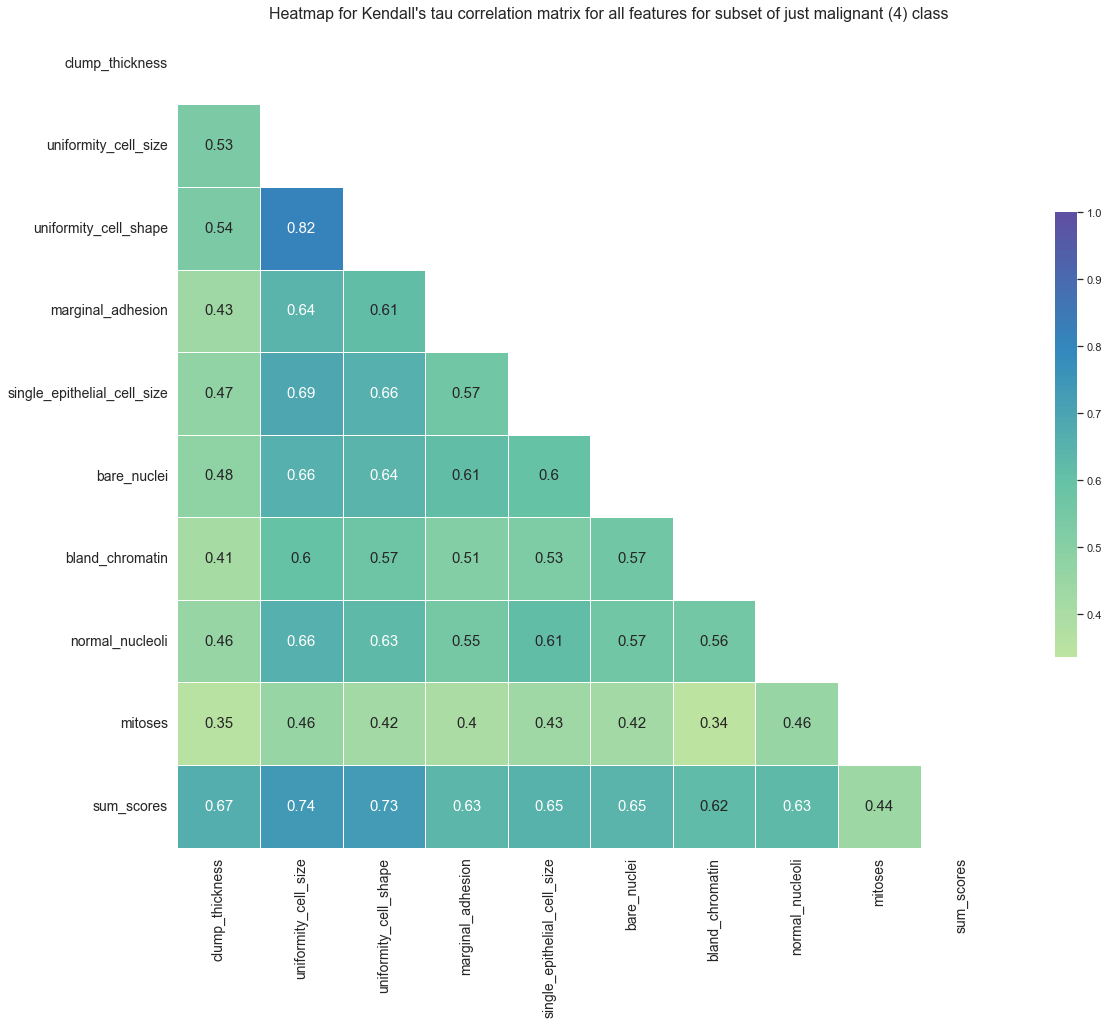

In [25]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_dropped_tau, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_dropped_tau, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for Kendall's tau correlation matrix for all features for subset of just malignant (4) class", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/heatmap_corr_tau_mal_plots.png', bbox_inches='tight',dpi=600)
plt.show()

In [26]:
corr_df_ben_tau = df_ben.drop(columns=['class'])
corr_df_ben_tau = corr_df_ben_tau.corr(method='kendall')
corr_df_ben_tau = corr_df_ben_tau.dropna()
corr_df_ben_tau

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,sum_scores
clump_thickness,1.000000,0.202340,0.225454,0.186269,0.171271,0.066164,0.060543,0.168596,0.030343,0.614264
uniformity_cell_size,0.202340,1.000000,0.514318,0.280371,0.266598,0.271958,0.132903,0.371437,0.173910,0.426142
uniformity_cell_shape,0.225454,0.514318,1.000000,0.239374,0.226647,0.208141,0.104325,0.250286,0.086809,0.416174
marginal_adhesion,0.186269,0.280371,0.239374,1.000000,0.185939,0.230147,0.035556,0.226328,0.147883,0.358365
single_epithelial_cell_size,0.171271,0.266598,0.226647,0.185939,1.000000,0.250129,0.051120,0.290416,0.053443,0.342527
bare_nuclei,0.066164,0.271958,0.208141,0.230147,0.250129,1.000000,0.133584,0.234116,0.172837,0.332408
bland_chromatin,0.060543,0.132903,0.104325,0.035556,0.051120,0.133584,1.000000,0.258148,0.011167,0.289588
normal_nucleoli,0.168596,0.371437,0.250286,0.226328,0.290416,0.234116,0.258148,1.000000,0.142998,0.350482
mitoses,0.030343,0.173910,0.086809,0.147883,0.053443,0.172837,0.011167,0.142998,1.000000,0.158937
sum_scores,0.614264,0.426142,0.416174,0.358365,0.342527,0.332408,0.289588,0.350482,0.158937,1.000000


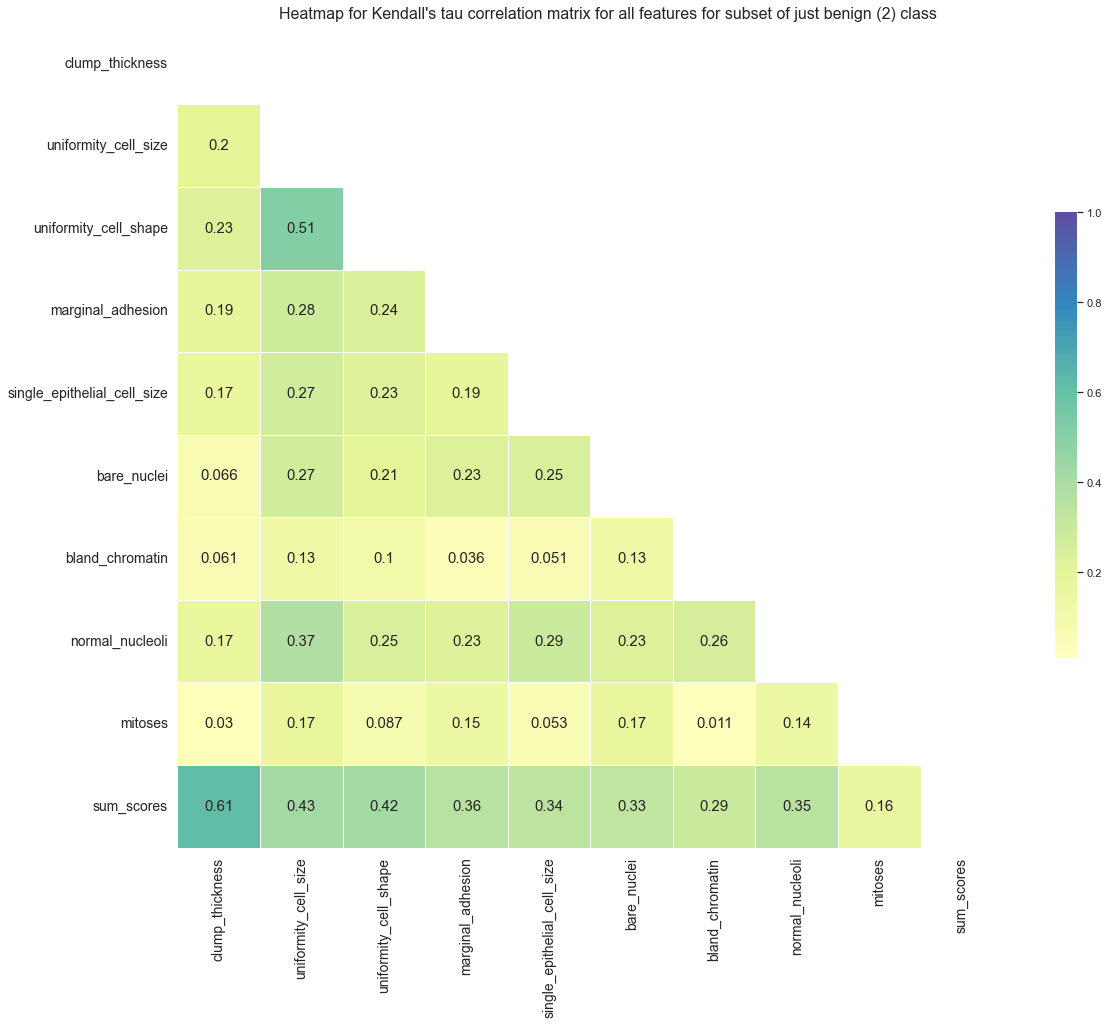

In [27]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df_ben_tau, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_df_ben_tau, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for Kendall's tau correlation matrix for all features for subset of just benign (2) class", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/heatmap_corr_tau_mal_plots.png', bbox_inches='tight',dpi=600)
plt.show()

In [28]:
corr_df_mal_tau = df_mal.drop(columns=['class'])
corr_df_mal_tau = corr_df_mal_tau.corr(method='kendall')
corr_df_mal_tau = corr_df_mal_tau.dropna()
corr_df_mal_tau

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,sum_scores
clump_thickness,1.000000,0.067114,0.084453,-0.104645,-0.012390,-0.006473,-0.009240,-0.019560,0.103130,0.134742
uniformity_cell_size,0.067114,1.000000,0.606167,0.249396,0.376063,-0.012534,0.306502,0.238627,0.157936,0.576783
uniformity_cell_shape,0.084453,0.606167,1.000000,0.212961,0.304149,0.045178,0.266073,0.237932,0.117453,0.550615
marginal_adhesion,-0.104645,0.249396,0.212961,1.000000,0.172076,0.184833,0.266634,0.143837,0.141964,0.429283
single_epithelial_cell_size,-0.012390,0.376063,0.304149,0.172076,1.000000,-0.021960,0.190437,0.217454,0.213358,0.447999
bare_nuclei,-0.006473,-0.012534,0.045178,0.184833,-0.021960,1.000000,0.112818,-0.072838,0.013244,0.197057
bland_chromatin,-0.009240,0.306502,0.266073,0.266634,0.190437,0.112818,1.000000,0.203019,0.014665,0.432914
normal_nucleoli,-0.019560,0.238627,0.237932,0.143837,0.217454,-0.072838,0.203019,1.000000,0.182390,0.407456
mitoses,0.103130,0.157936,0.117453,0.141964,0.213358,0.013244,0.014665,0.182390,1.000000,0.331635
sum_scores,0.134742,0.576783,0.550615,0.429283,0.447999,0.197057,0.432914,0.407456,0.331635,1.000000


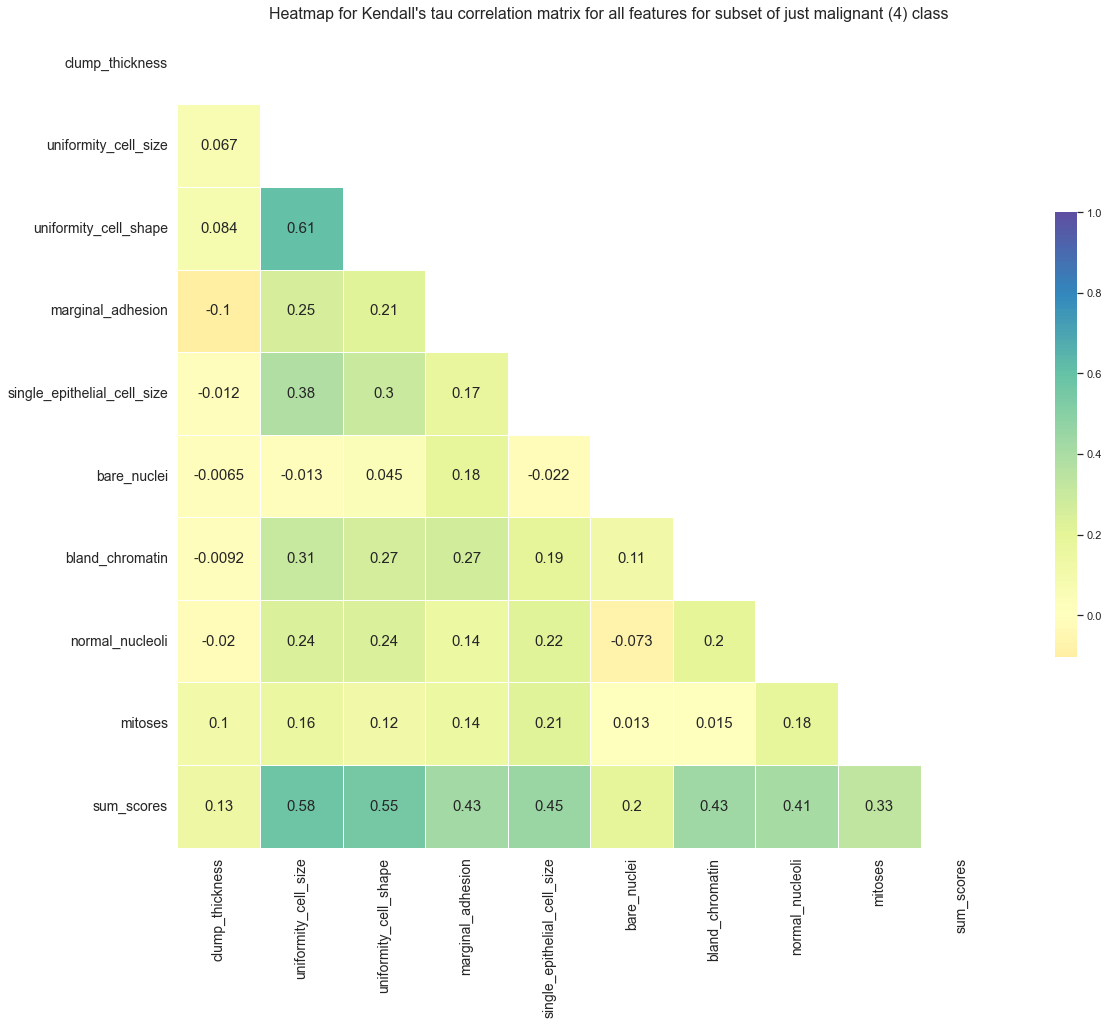

In [29]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df_mal_tau, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_df_mal_tau, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for Kendall's tau correlation matrix for all features for subset of just malignant (4) class", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
fig.savefig('../images/exploratory_analysis/heatmap_corr_tau_mal_plots.png', bbox_inches='tight',dpi=600)
plt.show()